In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

C:\Users\Tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Tanis\.cache\kagglehub\datasets\mirichoi0218\insurance\versions\1


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Prepare data for linear regression. Must do one-hot encoding to make sure the categorical features can be used in linear regression.

In [4]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder = encoder.fit_transform(df[categorical])
one_hot_df = pd.DataFrame(one_hot_encoder, columns=encoder.get_feature_names_out(categorical))
df_encoded = pd.concat([df, one_hot_df], axis=1)
insurance = df_encoded.drop(categorical, axis=1)

insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Use simple linear regression to predict charges from the bmi

In [5]:
X = insurance[['age']].values.reshape(-1, 1)
y = insurance[['charges']].values.reshape(-1, 1)

In [6]:
simpleLinear = LinearRegression()
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
simpleLinear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predicting the charges when the bmi is 30, 40, and 50

In [7]:
thirty = simpleLinear.predict([[30]])
forty = simpleLinear.predict([[40]])
fifty = simpleLinear.predict([[50]])

thirty, forty, fifty

(array([[11094.82547785]]),
 array([[13500.79107574]]),
 array([[15906.75667363]]))

Predicting with the X dataframe and plotting the data

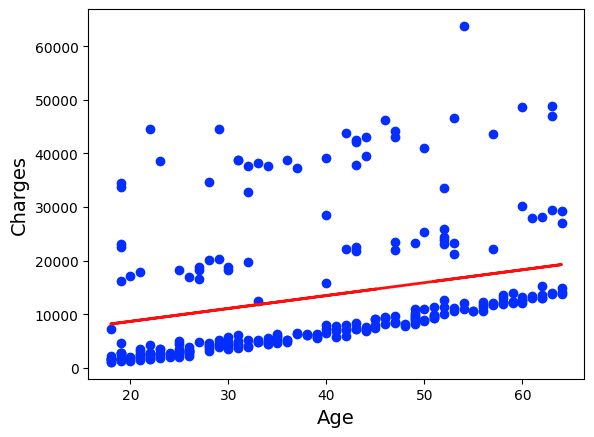

In [8]:
predict = simpleLinear.predict(X_test)
sorted = X_test.flatten().argsort()
plt.scatter(X_test.flatten(), y_test, color="#042eff")
plt.plot(X_test.flatten(), predict, color="#ff0e0e", linewidth=2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

Also Using Decision Tree Regressor to Model the Relationship

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = insurance.drop('charges', axis=1)
y = insurance[['charges']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Plotting the Data

In [ ]:
# 50 points between max and min values
age = np.linspace(insurance['age'].min(), insurance['age'].max(), 50)
bmi = np.linspace(insurance['bmi'].min(), insurance['bmi'].max(), 50)

# Makes two 2D arrays of possible pairings of age and bmi values
age_grid, bmi_grid = np.meshgrid(age, bmi)

# Defining fixed values for other features
fixed_values = {
    'children' : insurance['children'].median(),
    'sex_male'  : 1,
    'sex_female': 0,
    'smoker_no' : 1,
    'smoker_yes': 0,
    'northeast' : 0,
    'northwest' : 0,
    'southeast' : 1,
    'southwest' : 0
}

# Combining the grids into a single 2D array for prediction
grid = np.c_[
    age_grid.ravel(),
    bmi_grid.ravel(),
]

# Adding the fixed features as additional columns
for index, value in list(fixed_values.items()):
    fixed_array = np.full_like(age_grid.ravel(), fixed_values[index]).reshape(-1, 1)
    # Horizontally stack it onto grid
    grid = np.hstack([grid, fixed_array])

# Predict all combinations then reshape for easier plotting
pred = tree.predict(grid).reshape(age_grid.shape)

C:\Users\Tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


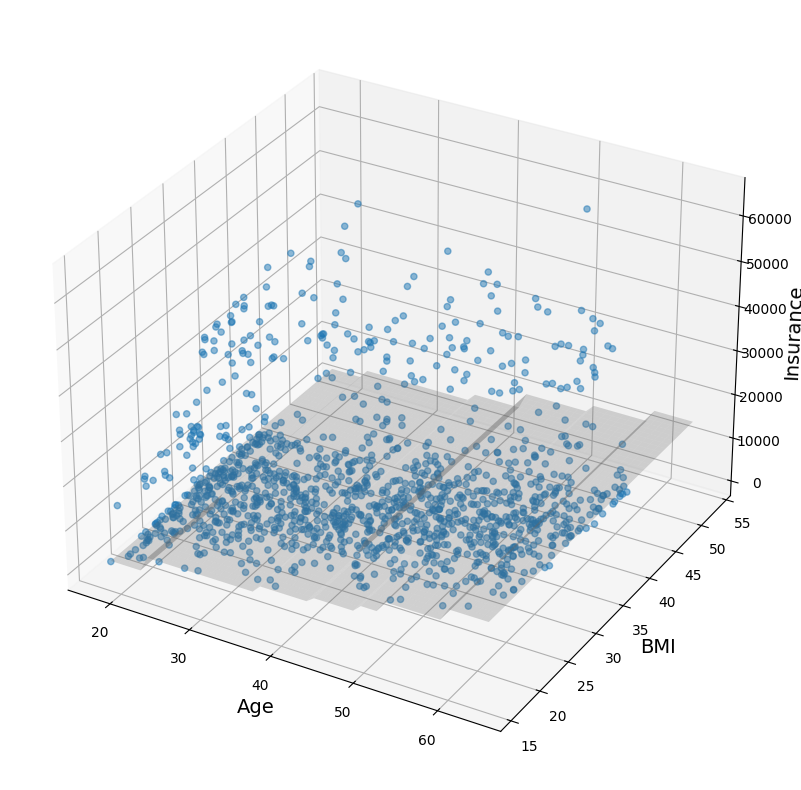

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.grid()
# Scatter the input variables and the output
ax.scatter(insurance[['age']], insurance[['bmi']], insurance[['charges']], color='#1f77b4', alpha=0.5)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('BMI', fontsize=14)
ax.set_zlabel('Insurance', fontsize=14)
ax.plot_surface(age_grid, bmi_grid, pred, alpha=.25, color='grey')
plt.show()

As age and BMI increase, there seems to be a general trend upward. As BMI increases, the data points move higher on the grid, showing higher insurance costs. The gray plane is lower on the age range of 20-30 compared to 50-60. There are some data points observed in a lower age range that have high insurance costs, but generally majority of the data shows higher costs with an older age.

Predicting Future Inputs with Models

In [14]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
models = {
    "Random Forest" : RandomForestRegressor(),
    "XGB" : XGBRegressor()
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Trying out different models and calculating the scores. Using 5 folds
for model_name, model in models.items():
    try:
        score = cross_val_score(
            model,
            X, 
            y, 
            cv=kfold,
            scoring='r2',
            n_jobs=-1,
            error_score='raise'
        )
        print(f"Model: {model_name}")
        print(f"Scores: {score}")
        print(f"Mean Accuracy: {score.mean():.4f}")
    except Exception as e:
        print("failure")


Model: Random Forest
Scores: [0.86399855 0.83185317 0.86683637 0.78311207 0.82561959]
Mean Accuracy: 0.8343
Model: XGB
Scores: [0.85536486 0.79623675 0.84007263 0.76486981 0.8057279 ]
Mean Accuracy: 0.8125


In [31]:
svr = SVR(kernel='rbf', C=100, gamma='auto')
# Different scalers to avoid data leakage
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X_train)
y_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

svr.fit(X_scaled, y_scaled)
svr_pred_scaled = svr.predict(X_scaled)

# Make it back to the original scale to calculate metrics
svr_pred = y_scaler.inverse_transform(svr_pred_scaled.reshape(-1, 1)).ravel()

# Calculate metrics
mse = mean_squared_error(y_train, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, svr_pred)
mae = mean_absolute_error(y_train, svr_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 17014734.31
RMSE: 4124.89
R^2: 0.88
MAE: 1984.25


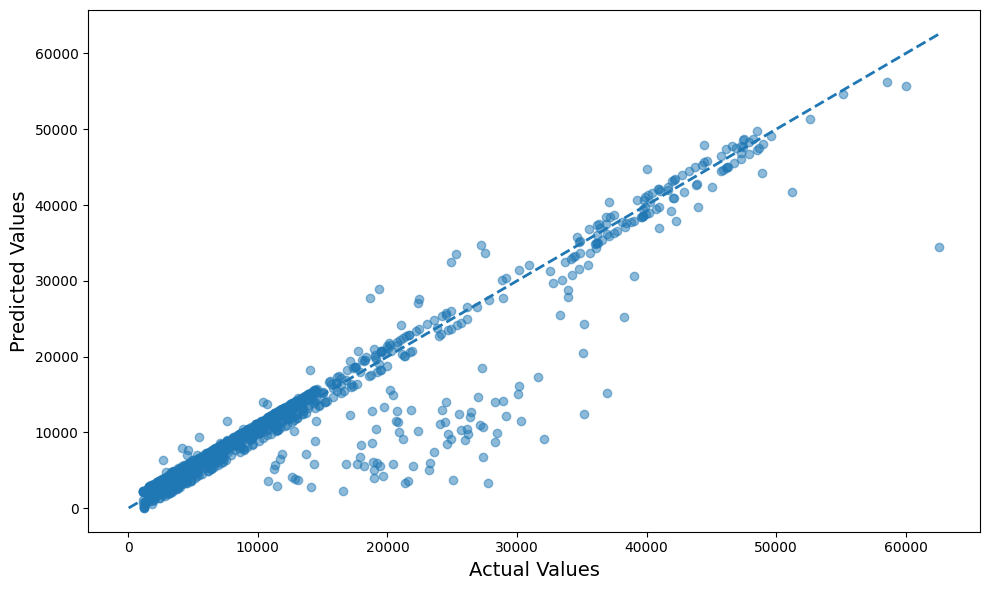

In [35]:
# Max and min of values
min_val = min(y_train.min().values[0], svr_pred.min())
max_val = max(y_train.max().values[0], svr_pred.max())

# Plotting the values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, svr_pred, alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], '--', lw=2) 
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.tight_layout()
plt.show()

In [36]:
# Making sure the right smoker and sex will be assigned
def data_clean_helper(sex_col, smoker_col):
    other_sex = "sex_female" if sex_col == "sex_male" else "sex_male"
    other_smoker = "smoker_no" if smoker_col == "smoker_yes" else "smoker_yes"
    
    return other_sex, other_smoker


In [37]:
# One region will have the value 1.0, the rest will have 0.0
def define_region(data, value_index, region_col):
    regions = ["northeast", "northwest", "southeast", "southwest"]

    for region in regions:
        if region == region_col:
            data[value_index[region_col]] = 1.0
        else:
            data[value_index["region_" + region]] = 0.0
    
    return data


In [38]:
values = X.columns.values
value_index = {col: i for i, col in enumerate(values)}

def data_clean(input):
    # Splitting the input values to handle the data
    input_values = input.split(",")
    data = [0] * len(value_index)

    # Depending on the column, inputs are assigned differently
    data[value_index['age']] = int(input_values[0])
    data[value_index['bmi']] = float(input_values[1])
    data[value_index['children']] = int(input_values[2])

    # Categorical values are taken and added to the rest of the column name
    sex_col = "sex_" + input_values[3].strip().lower()
    smoker_col = "smoker_" + input_values[4].strip().lower()
    region_col = "region_" + input_values[5].strip().lower()

    # Getting the sex and smoker columns
    other_sex, other_smoker = data_clean_helper(sex_col, smoker_col)

    # Assigning values for the sex and smoker columns
    data[value_index[sex_col]] = 1.0
    data[value_index[other_sex]] = 0.0

    data[value_index[smoker_col]] = 1.0
    data[value_index[other_smoker]] = 0.0

    # Assigning values for each region
    data = define_region(data, value_index, region_col)


    return data

In [39]:
# Function that predicts insurance using the data clean function
def predict_insurance(input):

    data = data_clean(input)

    scaled_data = X_scaler.fit_transform([data])
    
    return svr.predict(scaled_data)[0]

In [42]:
# Fixed input to predict insurance
user_input = predict_insurance("23,34.0,2,male,yes,northwest")

print(user_input)

real_pred = y_scaler.inverse_transform(np.array([[user_input]]))
print(real_pred)

-0.3267606335261961
[[9420.42249049]]
